# Drawdowns

* HODL misery index
* How much time is spend in drawdown of 10% or worse
* Compare Bitcoin to S&P500

In [138]:
# Imports
%matplotlib inline
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
# Get price data 
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin = bitcoin.shift(-1) # data set has daily open, we want daily close
sp500 = pd.read_csv('^GSPC.csv', index_col = 0, parse_dates = [0])

In [114]:
# Remove the 0's and start on same date
bitcoin = bitcoin.loc['2010-08-17':]
sp500 = sp500.loc['2010-08-17':]

In [115]:
max_so_far = np.maximum.accumulate(bitcoin['Value'])
bitcoin['Drawdown%'] = (max_so_far - bitcoin['Value']) / max_so_far  * 100

max_so_far = np.maximum.accumulate(sp500['Close'])
sp500['Drawdown%'] = (max_so_far - sp500['Close']) / max_so_far * 100

In [116]:
for i in [5,10,20,30,40]:
    print i,
    print "{:,.1f}%".format(bitcoin[bitcoin['Drawdown%'] > i].size / float(bitcoin.size) * 100),
    print "{:,.1f}%".format(sp500[sp500['Drawdown%'] > i].size / float(sp500.size) * 100)

5 89.9% 16.6%
10 86.9% 5.0%
20 79.4% 0.0%
30 74.5% 0.0%
40 69.8% 0.0%


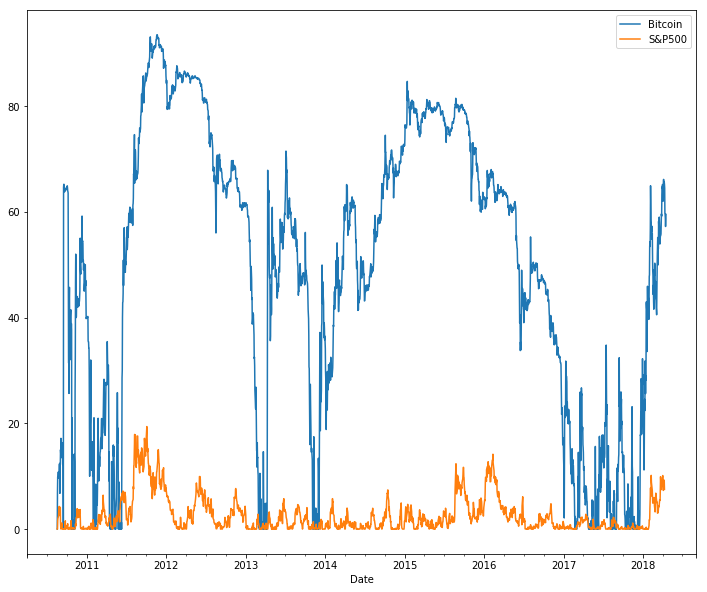

In [139]:
# Comparison of % drawdown over time
fig, ax = plt.subplots(figsize=(12,10))
bitcoin['Drawdown%'].plot(label = "Bitcoin", legend = True)
sp500['Drawdown%'].plot(label = "S&P500", legend = True)
fig.savefig("drawdowns.png", dpi=100)